<a href="https://colab.research.google.com/github/WanjohiChristopher/Audio-SignalProcessing/blob/main/SpeechRecognition_and_SignalProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install SpeechRecognition

     |████████████████████████████████| 32.8 MB 38 kB/s 


In [2]:
import scipy
import speech_recognition
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
from scipy.io import wavfile
freq_sm,sig_audi=wavfile.read('/content/drive/MyDrive/SpeechRecognitionFiles/machine-learning_speech-recognition_16-122828-0002.wav')

In [15]:
print('\n Shape of the signal is',sig_audi.shape)
print('\n Signal  datatype is',sig_audi.dtype)
print('\nSignal duration',round(sig_audi.shape[0]/float(freq_sm),2),'seconds')


 Shape of the signal is (46400,)

 Signal  datatype is int16

Signal duration 2.9 seconds


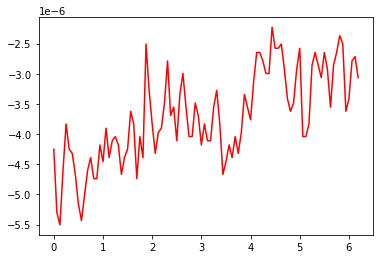

In [18]:
import numpy as np
import matplotlib.pyplot as plt

signal=sig_audi/np.power(3,15)
pow_audio=signal[:100]
time_axis=1000* np.arange(0,len(pow_audio),1)/float(freq_sm)
plt.plot(time_axis,pow_audio,color='red')

In [22]:
#creating a fourier transform for our signal
#defining inputs
sig_length=len(sig_audi)
half_length=np.ceil((sig_length+1)/2.0).astype(np.int)
print(sig_length)
print(half_length)

46400
23201


In [23]:
#fourier transform to form frequency domain of our bsignal
signal_freq=np.fft.fft(sig_audi)


In [26]:
#normalizing and squaring the frequency domain
signal_freq=abs(signal_freq[0:half_length])/sig_length
signal_freq **=2
transform_length=len(signal_freq)
print(transform_length)

23201


In [28]:
#adjusting fourier to even and odd cases
if sig_length % 2:
  signal_freq[1:transform_length] *=2
else:
    signal_freq[1:transform_length-1] *=2



In [33]:
# get signal strength in decibels (dB)
Exp_signal=10*np.log10(signal_freq)
x_axis=np.arange(0,half_length,1) * (freq_sm/sig_length)/1000.0

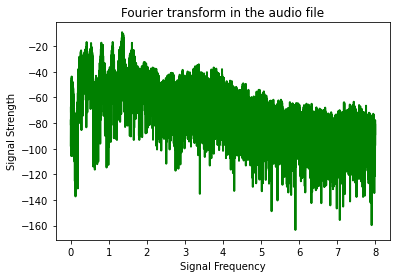

In [35]:
#plotting signal
plt.title('Fourier transform in the audio file')
plt.xlabel('Signal Frequency')
plt.ylabel('Signal Strength')
plt.plot(x_axis,Exp_signal,color='green',linewidth=2  )

In [36]:
!pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=63d686644a7128a96730ca3ebd46b36735bfedb476ef36e3e140c432d456ee0e
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [39]:
#extracting features from the speech 
#converting the frequency domain obtained to a feature vector
#MFCC'S is Mel frequency cepstral coefficients are used to extract features from audio signal
#mel scale is used
from python_speech_features import mfcc,logfbank
# we take the first 15000 lines in our signal analysis
sig_audio=sig_audi[:15000]
#mfcc use to extract features fro m signal
mfcc_features=mfcc(sig_audi,freq_sm)




In [40]:
print(mfcc_features)

[[  9.591213   -16.81803827  -1.29619254 ...   3.94322381   0.60139626
   -3.17088426]
 [  9.50868931 -23.80719323  -4.62957719 ...   1.56270037  -5.30248606
  -10.17806985]
 [  9.44293014 -21.94152534  -2.96797813 ...   6.0896495    1.52298078
  -11.9523773 ]
 ...
 [  9.66508044 -16.99838082  -2.09532588 ...   3.98774245   3.35367723
  -15.33042719]
 [  9.56543613 -16.77974846  -4.72691162 ...   5.93305736   9.27714807
  -12.6220271 ]
 [  9.286129   -16.01666478  -2.79103648 ...   5.2609661   11.15971512
  -10.45471141]]


In [43]:
print('The mfcc parameters are:',mfcc_features.shape[0])

The mfcc parameters are: 289


In [42]:
print('The individual feature length is:',mfcc_features.shape[1])

The individual feature length is: 13


In [46]:
#Transposing our features
mfcc_features=mfcc_features.T

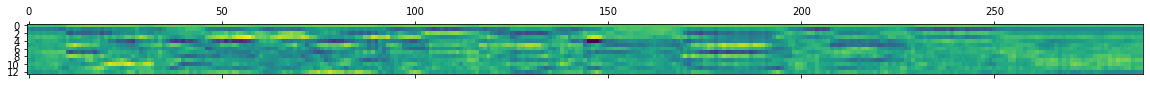

In [61]:
#Plotting our features
plt.figure(figsize=(20,8))
#plt.title('Representation of Features extracted(MFCC FEATURES)')
plt.matshow(mfcc_features,fignum=1)

           The first horizontal lines below every segment are the fundmental frequency and at their  strongest.Above  the yelow are the harmonics that share the  same frequency distance between them

In [62]:
#generating filterbanks features
fb_features=logfbank(sig_audi,freq_sm)

In [63]:
#transposing oure filterbank features
fb_features=fb_features.T

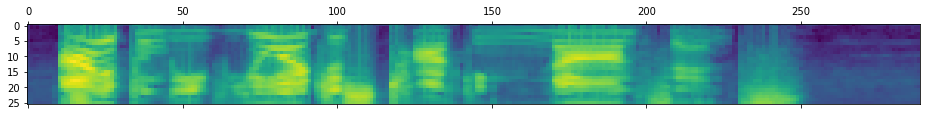

In [65]:
plt.matshow(fb_features,fignum=4)

         The MFCC, along with application of Filter Banks is a good algorithm to separate the high and low frequency signals. This expedites the analysis process as we can trim sound signals into two or more separate segments and individually analyze them based on their frequencies.